# torch.nn
19/09/2022 by LimBus

Neural networks can be constructed using the ``torch.nn`` package.

* TORCH.NN >> [torch.nn](https://pytorch.org/docs/stable/nn.html#convolution-layers)
  * Convolution Layers
    * [nn.conv1d](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html#torch.nn.Conv1d)
    * [nn.conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d)
    * [nn.conv3d](https://pytorch.org/docs/stable/generated/torch.nn.Conv3d.html#torch.nn.Conv3d)
    * [nn.ConvTranspose1d](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose1d.html#torch.nn.ConvTranspose1d)
    * [nn.ConvTranspose2d](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html#torch.nn.ConvTranspose2d)
    * [nn.ConvTranspose3d](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose3d.html#torch.nn.ConvTranspose3d)
  * Polling Layers
    * [nn.MaxPool1d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool1d.html#torch.nn.MaxPool1d)
    * [nn.MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)
    * [nn.MaxPool3d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool3d.html#torch.nn.MaxPool3d)
    * [nn.AvgPool1d](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool1d.html#torch.nn.AvgPool1d)
    * [nn.AvgPool2d](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html#torch.nn.AvgPool2d)
    * [nn.AvgPool3d](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool3d.html#torch.nn.AvgPool3d)
  * Non-linear Activations
    * [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)
    * [nn.LeakyReLU](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU)
    * [nn.Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid)
    * [nn.Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh)
    * [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax)
  * Normalization Layers
    * [nn.BatchNorm1d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d)
    * [nn.BatchNorm2d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html#torch.nn.BatchNorm2d)
    * [nn.BatchNorm3d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm3d.html#torch.nn.BatchNorm3d)
  * Linear Lyers
    * [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
  * Dropout Layers
    * [nn.Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)
    * [nn.Dropout2d](https://pytorch.org/docs/stable/generated/torch.nn.Dropout2d.html#torch.nn.Dropout2d)
    * [nn.Dropout3d](https://pytorch.org/docs/stable/generated/torch.nn.Dropout3d.html#torch.nn.Dropout3d)
  * Loss Functions
    * [nn.MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss)
    * [nn.BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss)

## Some linear algebra in PyTorch

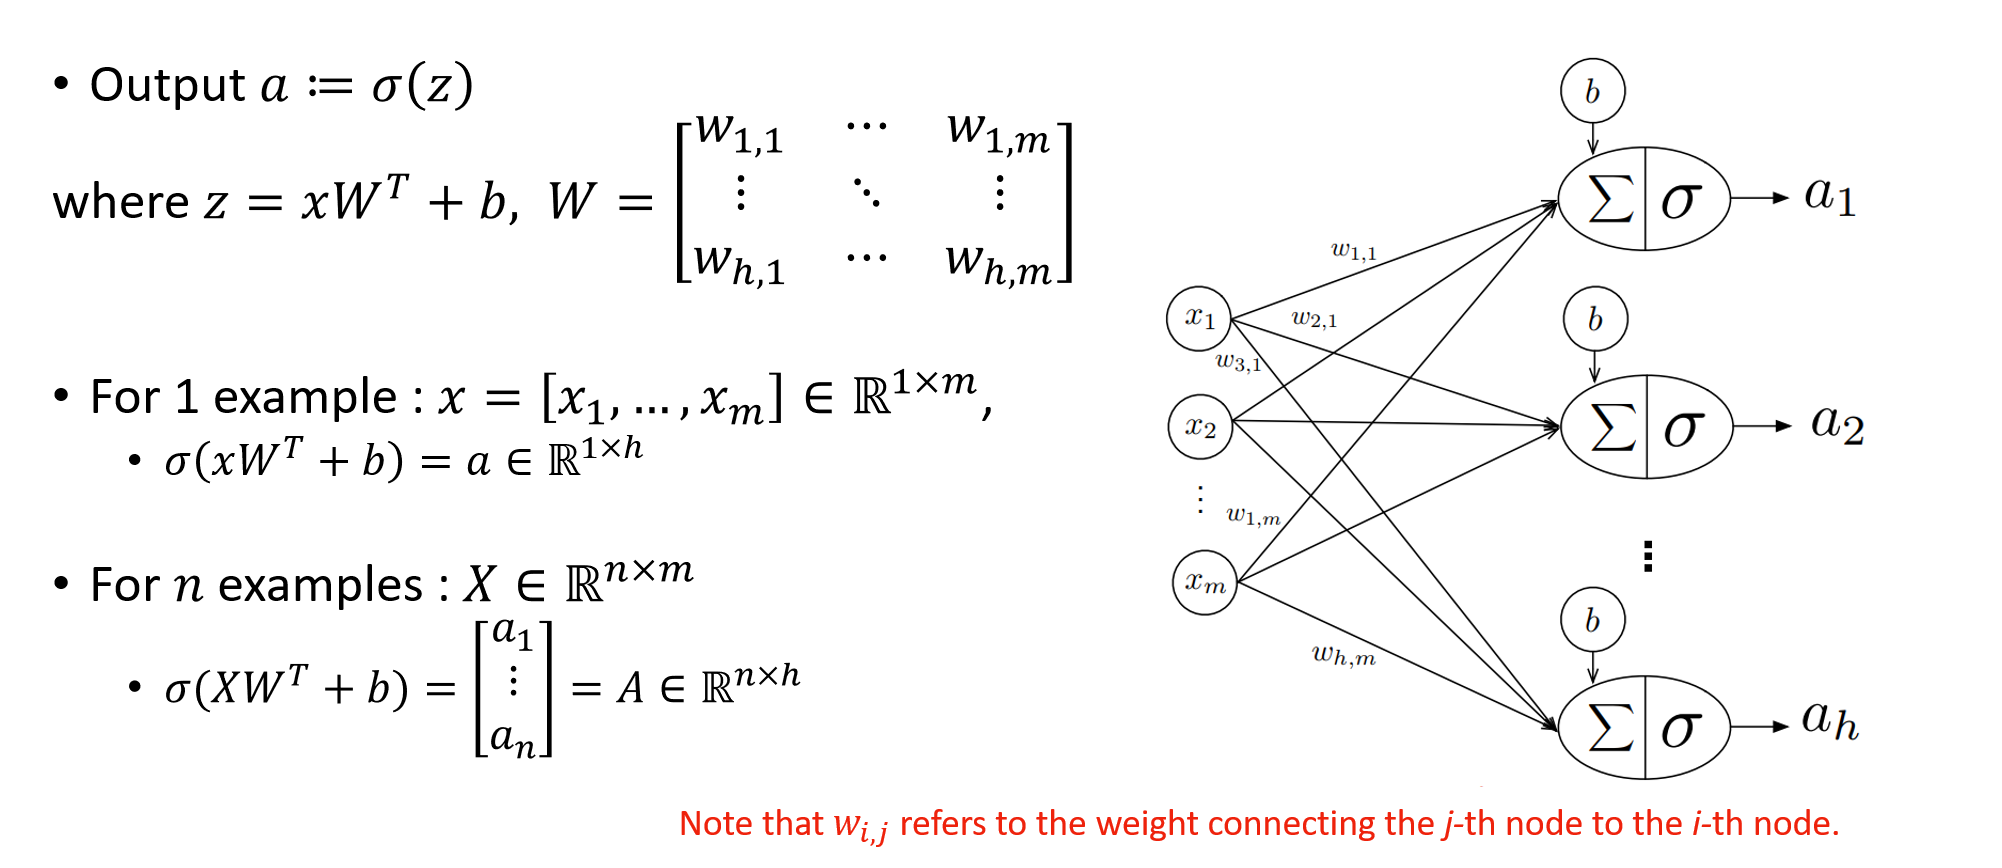

## Simple Linear Layer

In [ ]:
import torch

In [ ]:
X = torch.arange(50, dtype=torch.float).view(10,5)
X

In [ ]:
lin_layer = torch.nn.Linear(in_features=5, out_features=3)

In [ ]:
lin_layer.weight

In [ ]:
lin_layer.bias

In [ ]:
lin_layer.weight.T.size()

In [ ]:
print('dim(X):', X.size())
print('dim(W):', lin_layer.weight.size())
print('dim(b):', lin_layer.bias.size())
output = lin_layer(X)
print('output: {} \t {}'.format(output, output.shape))

print('XW^T+b: {} \t {}'.format(X.matmul(lin_layer.weight.T)+lin_layer.bias, (X.matmul(lin_layer.weight.T)+lin_layer.bias).shape))

## Linear Regression Model

In [ ]:
torch.manual_seed(1)
class MyModel(torch.nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.linear = torch.nn.Linear(1, 1, bias=False)
    # self.linear.weight.detach().zero_()

  def forward(self, x):
    return self.linear(x)

model = MyModel()
model.linear.weight

In [ ]:
torch.manual_seed(1)
class MyDataset(torch.utils.data.Dataset):
  def __init__(self, lenght=100):
    self.len = lenght
    self.X = torch.linspace(-1,1,lenght)
    rand = 2*torch.rand_like(self.X) - 1
    self.y = 2*self.X + 0.5*rand
  
  def __getitem__(self, index):
    sample = self.X[index], self.y[index]
    return sample
  
  def __len__(self):
    return self.len

In [ ]:
my_dataset = MyDataset(100)
X, y = my_dataset[:]
X.shape, y.shape

In [ ]:
from torchsummary import summary
summary(model, X.view(-1,1).shape)

In [ ]:
res = model(X.view(-1,1))

In [ ]:
X.shape, y.shape

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X.numpy(), y.numpy())
plt.plot(X.numpy(), res.detach().numpy(), color='r')
plt.show()